In [34]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor

In [35]:
#cargamos los datos de entrada
#header=0,
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
data.shape

# Ver los 1ros registros
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104832 entries, 0 to 104831
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   hors    104832 non-null  int64  
 1   ws      104832 non-null  float64
 2   wd      104832 non-null  float64
 3   anno    104832 non-null  int64  
 4   mes     104832 non-null  int64  
 5   wp1     104832 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 5.6 MB


In [36]:
# Eliminaremos variables que no aportan en la clase wp1

#data.drop(['hors','dia','horsObs'], axis=1, inplace=True)
#data.head()

In [37]:
# Ahora veamos algunas estadísticas de nuestros datos
#data.describe()

In [38]:
# Visualizamos rápidamente las caraterísticas de entrada
#data.hist()
#plt.show()

In [43]:

data_train = data.sample(frac=1,random_state=200) 
data_test = data.drop(data_train.index) 


dataset = data_train.values

x_train = dataset[:,1:3]
y_train = dataset[:,5]

x_test = dataset[:,1:5]
y_test = dataset[:,5]

nn = MLPRegressor(
    hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=10, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

hist=nn.fit(x_train, y_train)

#test_x = np.array(x)
y_predict = nn.predict(x_train)

#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
#ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
#plt.show()

Iteration 1, loss = 11.17905915
Iteration 2, loss = 0.01450636
Iteration 3, loss = 0.01446087
Iteration 4, loss = 0.01442521
Iteration 5, loss = 0.01439649
Iteration 6, loss = 0.01437262
Iteration 7, loss = 0.01434256
Iteration 8, loss = 0.01432084
Iteration 9, loss = 0.01431237
Iteration 10, loss = 0.01430003
Iteration 11, loss = 0.01429471
Iteration 12, loss = 0.01430142
Iteration 13, loss = 0.01431115
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [40]:
#print('Coefficients: \n', nn.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_predict))
#print('Score : {:.3f}'.format(nn.score(x_test, y_test)))
print('num of layers: ', nn.n_layers_)
print('current loss computed with the loss function: ',nn.loss_)

Mean squared error: 0.03
num of layers:  3
current loss computed with the loss function:  0.01431115458219917


In [45]:
pred_train = y_predict
pred_train_plot = pred_train[2000:2050]
y_train_plot = y_train[2000:2050]
neuronas =100
corr = np.corrcoef(y_train, pred_train)

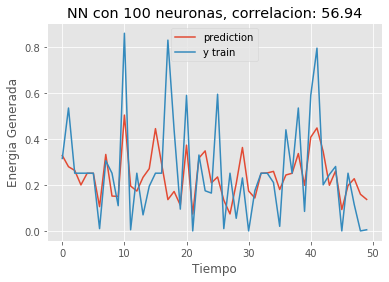

In [47]:
plt.plot(pred_train_plot, label ="prediction")
plt.plot(y_train_plot, label ="y train")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("NN con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

In [49]:
#pd.DataFrame(nn.loss_curve_).plot()

In [54]:
from sklearn.model_selection import learning_curve

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes = [0.05, 0.15,0.5, 0.75, 1]


train_sizes, train_scores, valid_scores = learning_curve(
                                                        MLPRegressor(activation="relu",random_state=0), 
                                                        x_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        cv=5,
                                                        scoring = 'neg_mean_squared_error')

In [55]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 4193     0.029085
12579    0.029364
41932    0.029073
62898    0.030108
83865    0.029017
dtype: float64

 --------------------

Mean validation scores

 4193     0.029039
12579    0.029030
41932    0.029058
62898    0.030159
83865    0.029042
dtype: float64


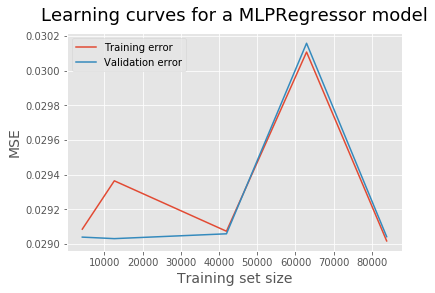

In [52]:
#plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)

title = 'Learning curves for a ' + str(MLPRegressor()).split('(')[0] + ' model'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

## Validation test

In [204]:

#MLPRegressor().get_params().keys()
#sorted(sklearn.metrics.SCORERS.keys())

[0.05904217 0.04403874 0.04902297 0.03628659 0.04768793 0.03976445
 0.03591525 0.05818566 0.0895081  0.03688925 0.05093187 0.04240638
 0.05100457 0.03985248 0.03705845 0.03829849 0.03923525 0.03618193
 0.13163848 0.19123868 0.08662523 0.03662145 0.03797586 0.06571911
 0.09599618]


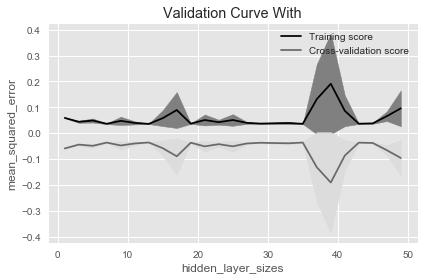

In [205]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPRegressor(), 
                                             x_test, 
                                             y_test, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
#train_mean = np.mean(train_scores, axis=1)
#train_std = np.std(train_scores, axis=1)

train_mean = -train_scores.mean(axis = 1)
train_std = -train_scores.std(axis = 1)

print (train_mean)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With" )
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [251]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

y_12 = nn.predict([[3.66,106.24,2009,7]])
print(y_12)

[0.13636744]


In [252]:
#print('coefficients: ', nn.coefs_[1] )
#len(nn.coefs_[0][1])

print(nn.coefs_[1][89])

coef1 = nn.coefs_[0][0]
coef2 = nn.coefs_[0][1]
coef3 = nn.coefs_[0][2]
#coef4 = nn.coefs_[0][3]

#print( len(coef4) )

print(coef1[89])
print(coef2[89])
print(coef3[89])
#print(coef4[89])


[0.19731277]
0.22686566922004597
-0.09169792041786326
0.06543440191428704


In [8]:

df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
df_test.head()

,ws,wd,anno,mes
0,6.00,129.58,2009,7
1,5.95,129.18,2009,7
2,5.58,128.26,2009,7
3,5.02,126.75,2009,7
4,4.36,124.69,2009,7


In [9]:
dataX2_test =  pd.DataFrame()
dataX2_test["ws"] = df_test["ws"]
dataX2_test["wd"] = df_test["wd"]
dataX2_test["anno"] =df_test["anno"]
dataX2_test["mes"] =df_test["mes"]

In [10]:
y_12 = nn.predict(dataX2_test)
print(y_12)

[0.44166352 0.43965793 0.42452735 0.40164367 0.37471337 0.34947685
 0.32916999 0.3183582  0.3199698  0.33602315 0.36020803 0.38342907
 0.3999558  0.4119809  0.42663811 0.44724127 0.47277268 0.49770593
 0.51620139 0.51760316 0.48954597 0.42734817 0.35669561 0.30857801
 0.29759746 0.3088601  0.32699567 0.33776647 0.34037593 0.33683956
 0.33039185 0.3279936  0.33389419 0.35361293 0.38392379 0.41855619
 0.45254504 0.48394007 0.5081844  0.52007485 0.52475365 0.53226439
 0.54696692 0.55411477 0.53319129 0.47267314 0.39527959 0.33268359]
